# Histograma, ruido y filtrado

A continuación haremos uso de las funciones para dada una imagen con ruido removerlo y mejorarla a através del método de igualación por histograma.

* Seleccione una imagen con extensión tif de la página del curso añadir ruido tipo Sal y Pimienta usando la función imnoise en una densidad que afecte al 2% de los pixeles.

* Transformamos la imagen por igualación de histograma para mejorar la imagen ¿Se elimina el ruido?, ¿Cómo podrá eliminar el ruido?

* Remover el ruido usando usando medfilt2 con tres tamaños de ventanas diferentes

* Plotear usando subplot, la imagen original, la imagen con ruido, la imagen mejorada por histograma por igualación y la imagen filtrada

In [1]:
#Seleccione una imagen con extensión tif de la página del curso añadir ruido tipo Sal y Pimienta usando la función imnoise en una densidad que afecte al 2% de los pixeles.


import cv2
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
from skimage import io
import math



#Añade ruido impulsivo a una imagen

# b: imagen de salida con ruido
# a: imagen de entrada
# p: probabilidad del ruido
# imin: valor del impulso de ruido mínimo
# imax: valor del impulso de ruido máximo

a = io.imread('Imagenes_Pruebas/cerebro.JPG',0)
p = 0.02
imin = 2
imax = 4

print(a.shape)
mp = math.ceil(p*a.shape[0]*a.shape[1])
turno = 0
b = a
for inp in range (mp):
    k = math.ceil(a.shape[0]*np.random.rand())-1
    l = math.ceil(a.shape[1]*np.random.rand())-1
    if (turno ==0):
        turno = 1
    else:
        turno = 0
        b[k][l] = imin
io.imshow(b)
io.imsave('Imagenes_Pruebas/cerebro_sp.JPG', b)





(326, 325, 3)


C:\Users\SARA\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\SARA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


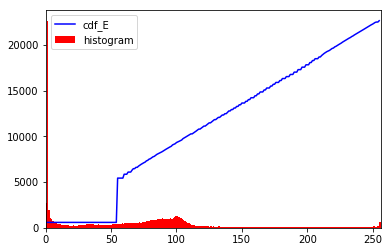

C:\Users\SARA\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\SARA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


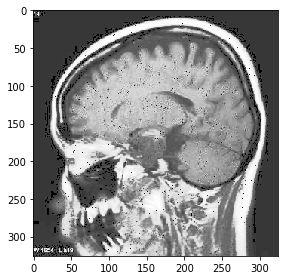

In [2]:
#Transformamos la imagen por igualación de histograma para mejorar la imagen ¿Se elimina el ruido?, ¿Cómo podrá eliminar el ruido?

img = cv2.imread('Imagenes_Pruebas/cerebro_sp.JPG',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf_E = hist.cumsum()
cdf_normalized_E = cdf_E * hist.max()/ cdf_E.max()
plt.plot(cdf_normalized_E, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf_E','histogram'), loc = 'upper left')
plt.show()
io.imshow(img2)

In [4]:
#Remover el ruido usando usando medfilt2 con tres tamaños de ventanas diferentes

import numpy as np
import scipy.signal as signal
from scipy import signal

c = scipy.signal.medfilt2d(b,3)
io.imshow(c)





NameError: name 'scipy' is not defined